In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
train = pd.read_csv("SalaryData_Train.csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'educationno'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>],
       [<AxesSubplot:title={'center':'hoursperweek'}>, <AxesSubplot:>]],
      dtype=object)

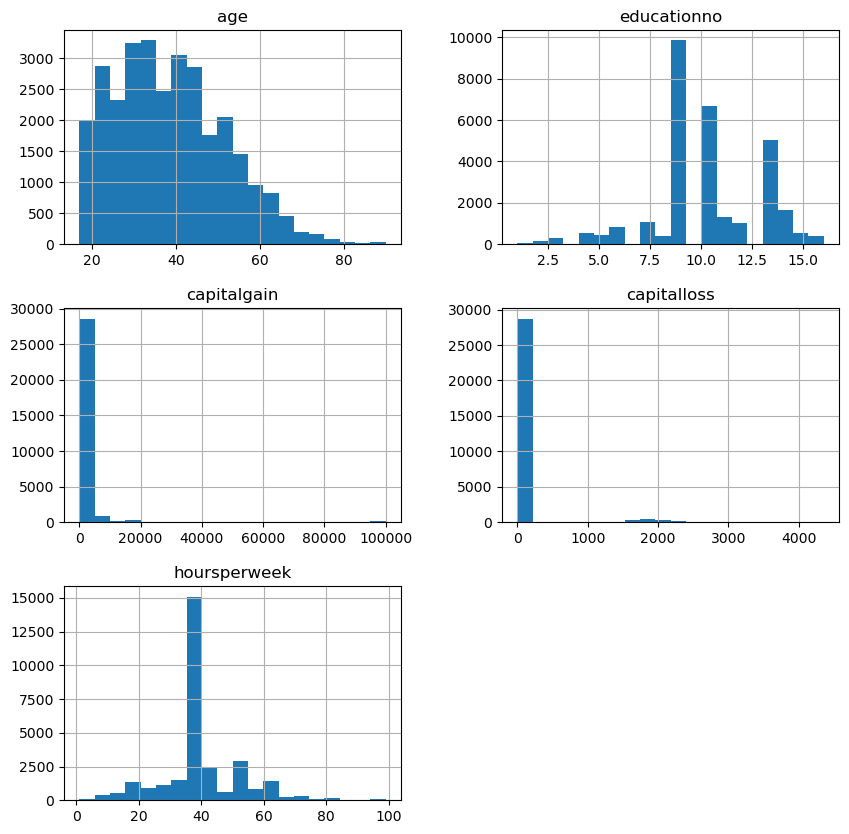

In [4]:
train.hist(figsize=(10,10), bins=20)

In [5]:
test = pd.read_csv("SalaryData_Test.csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'educationno'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>],
       [<AxesSubplot:title={'center':'hoursperweek'}>, <AxesSubplot:>]],
      dtype=object)

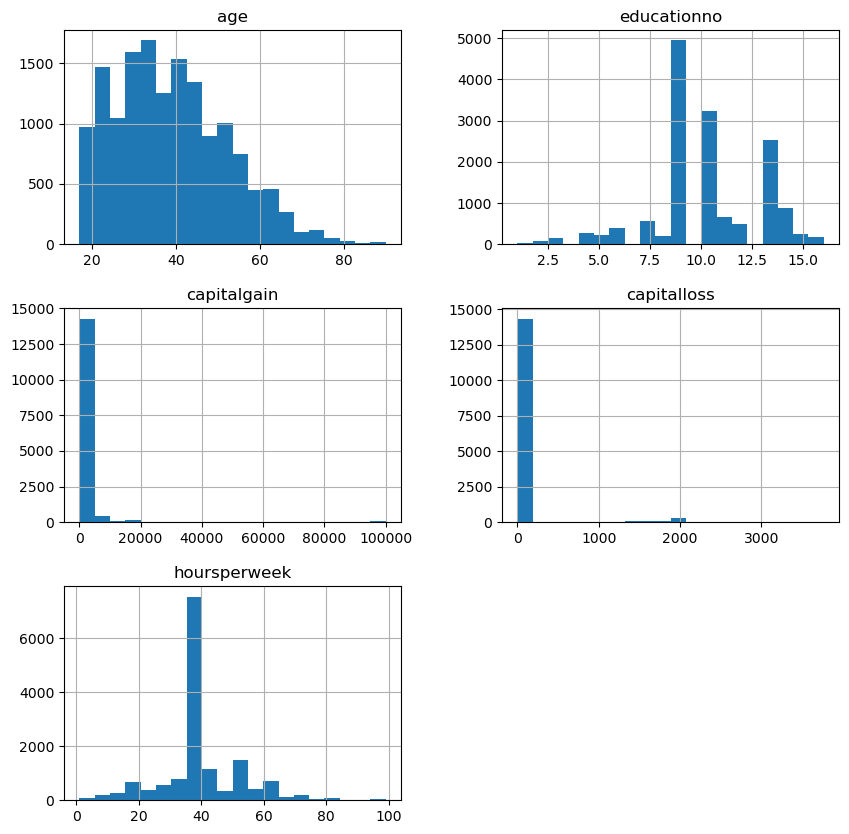

In [7]:
test.hist(figsize=(10,10), bins=20)

In [8]:
number = LabelEncoder()
for i in train.columns:
    if train[i].dtype == object:
        train[i] = number.fit_transform(train[i])

for i in test.columns:
    if test[i].dtype == object:
        test[i] = number.fit_transform(test[i])
        
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [9]:
X_train = train.iloc[:, :-1]
X_test = test.iloc[:, :-1]
y_train = train.iloc[:, -1]
y_test = test.iloc[:,-1]

In [10]:
scaler = MinMaxScaler()
model = scaler.fit(X_train)
X_train = model.transform(X_train)
model = scaler.fit(X_test)
X_test = model.transform(X_test)

In [11]:
#model1 = SVC()
#param1 = [{'kernel':['rbf','linear','poly','sigmoid'],'gamma':[50, 5, 10, 0.5],'C':[1000,500,100,50,15,14,13,12,11,1,0.1,0.01,0.01,0.001]}]
#gsv= GridSearchCV(model1, param1, cv=10)
#gsv.fit(X_train, y_train)

In [13]:
mod_linear = SVC(kernel="linear")
mod_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
pred_linear = mod_linear.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, pred_linear)*100)

Accuracy 80.98273572377158


In [18]:
mod_rbf = SVC(kernel="rbf")
mod_rbf.fit(X_train, y_train)
pred_rbf = mod_rbf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, pred_rbf)*100)

Accuracy 84.32934926958832


In [22]:
mod_poly = SVC(kernel="poly")
mod_poly.fit(X_train, y_train)
pred_poly = mod_poly.predict(X_test)
print("Accuracy", round(metrics.accuracy_score(y_test, pred_poly)*100),2)

Accuracy 84 2


In [21]:
mod_sig = SVC(kernel="sigmoid")
mod_sig.fit(X_train, y_train)
pred_sig = mod_sig.predict(X_test)
print("Accuracy", round(metrics.accuracy_score(y_test, pred_sig)*100,2))

Accuracy 57.69


## RBF Kernel has the best accuracy score